In [1]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from order_statistics import estimate_stddev_of_normal_distribution
from aux import calculate_mse

# 1 sample example

In [4]:
sample_size = 1000
mu = 100
std_dev = 10
normal_distribution = sts.norm(loc=mu, scale=std_dev)

sample = normal_distribution.rvs(size=sample_size)

sample_std_dev = sample.std()

our_estimate = estimate_stddev_of_normal_distribution(sample)


print(f'true std dev: {std_dev}')
print(f'sample std dev: {sample_std_dev}')
print(f'order statistics estimation: {our_estimate}')

true std dev: 10
sample std dev: 10.09990584994482
order statistics estimation: 9.979989212400026


##### Both estimators, MLE and order statistics estimator, give results close to true std dev

# Generating multiple samples

In [6]:
n_samples = 300
estimates = []
mle_estimates = []
our_estimates = []
our_estimates_means = []

for i in range(n_samples):
    sample = normal_distribution.rvs(size=sample_size)
    sample_std_dev = sample.std()
    our_estimate = estimate_stddev_of_normal_distribution(sample)
    
    estimates.append({'sample std dev': sample_std_dev, 'order statistics estimate': our_estimate})
    mle_estimates.append(sample_std_dev)
    our_estimates.append(our_estimate)
    
    our_estimates_means.append(np.array(our_estimate).mean())

In [7]:
mle_estimates = np.array(mle_estimates)
our_estimates = np.array(our_estimates)

In [8]:
print(f'mean of MLE estimates: {mle_estimates.mean()}')
print(f'mean of order statistics estimates: {our_estimates.mean()}')

mean of MLE estimates: 9.98493390496975
mean of order statistics estimates: 9.989532643895721


In [9]:
print(f'MSE of MLE estimates: {calculate_mse(mle_estimates, std_dev)}')
print(f'MSE of order statistics estimates: {calculate_mse(our_estimates, std_dev)}')

MSE of MLE estimates: 15.238329444064345
MSE of order statistics estimates: 17.050001186429196


##### So we see that order statistics estimator is almost as good as MLE

## The following plot suggests that order statistics estimator is somewhat unbiased

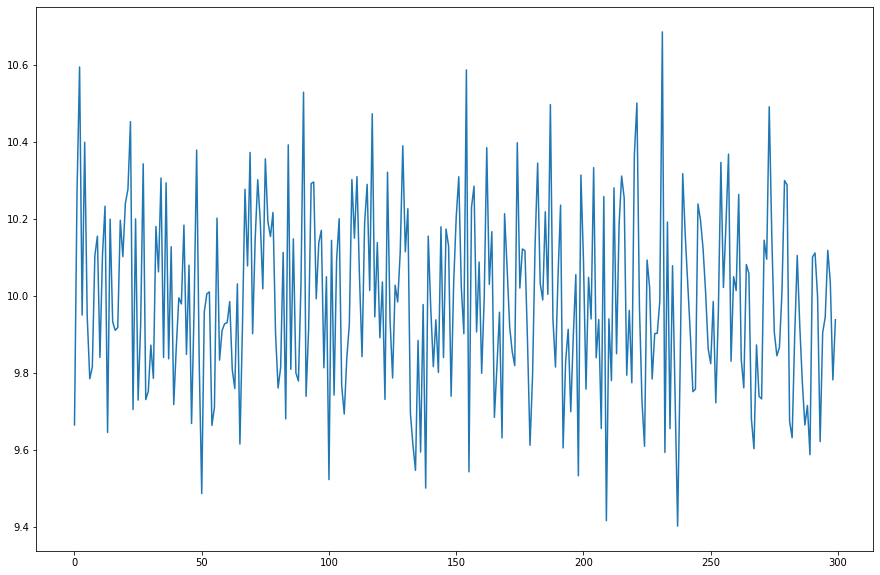

In [10]:
plt.figure(figsize=(15, 10))

plt.plot(our_estimates_means)

plt.show()

In [12]:
sample_size = 1000
# sample_std_devs = []
our_estimates = []
mle_estimates = []

for i in range(9, sample_size + 1):
    sample = normal_distribution.rvs(size=i)
    mle_estimates.append(sample.std())
    our_estimates.append(estimate_stddev_of_normal_distribution(sample))

## The next plot shows hat as sample size gets larger, order statistics estimator becomes closer to the true parameter value. This implies that the estimator is consistent

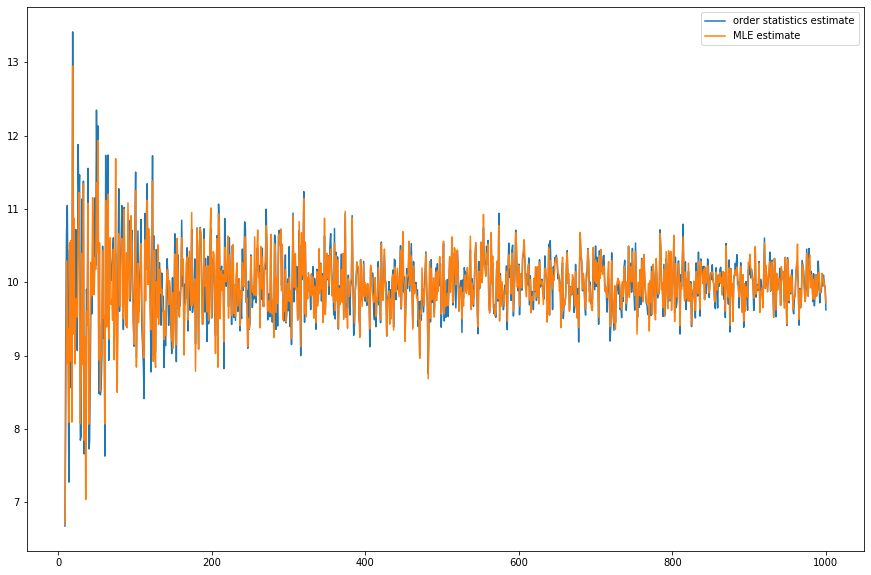

In [15]:
plt.figure(figsize=(15, 10))

sample_sizes = np.arange(9, sample_size + 1)

plt.plot(sample_sizes, our_estimates, label='order statistics estimate')
plt.plot(sample_sizes, mle_estimates, label='MLE estimate')

plt.legend()
plt.show()

##### Overall, it's easy to see that the order statistics estimator behaves very similarly to the MLE